# Hwk 1: Data Science Computing Spring 2020 
#### Due: April 2, 2020
#### Group: Isela De La Cerda, Tianlin Xu, Gen Zhu

# Funding and Publication
In this case study, we want to find out the relationship between funding and publications. Later on, we will introduce more advanced analysis of the data, but the first step is to collect the data! The HW01 folder on Canvas provides a csv file that contains recent NIH awards of faculty and students from Harvard University. This list is provided by NIH. However, it did not provide the publications of each awardee. We will use PubMed as a complementary source of data. For simplicity, we will focus on the number of publications of each awardee only.

## Task 1

Remove the awards (column: Activity) starting with letter T or F, and then extract the unique PI names from the column: Contact PI / Project Leader.

In [12]:
#import libraries
import pandas as pd
import os
import re

In [13]:
nihharvard = pd.read_csv('NIHHarvard.csv')
nihharvard.shape

(591, 20)

In [29]:
# view the dataframe
nihharvard.head(5)

,Organization,Project Title,Administering IC,Application ID,Project Number,Type,Activity,IC,Serial Number,Support Year,Suffix,Subproject Number,Contact PI Person ID,Contact PI / Project Leader,Other PI or Project Leader(s),Organization Name,ARRA Indicator,FY,FY Total Cost,FY Total Cost (Sub Projects)
0,harvard,TRAINING IN BIOINFORMATICS AND INTEGRATIVE GEN...,NHGRI,8729396,5T32HG002295-12,5,T32,HG,2295,12,NaN,NaN,8644899,"PARK, PETER J",Not Applicable,HARVARD MEDICAL SCHOOL,,2014,1,NaN
1,harvard,SUBSTANCE ABUSE AT THE SCHIZOPHRENIA INTERNATI...,NIDA,8650549,1R13DA036925-01,1,R13,DA,36925,1,NaN,NaN,1893427,"DELISI, LYNN ELEANOR",Not Applicable,HARVARD MEDICAL SCHOOL,,2014,10000,NaN
2,harvard,16TH IMS NEW RESEARCHERS CONFERENCE,NCI,8785919,1R13CA189533-01,1,R13,CA,189533,1,NaN,NaN,9834897,"AIROLDI, EDOARDO MARIA",Not Applicable,HARVARD UNIVERSITY,,2014,15000,NaN
3,harvard,CONFERENCES ON EMERGING STATISTICAL ISSUES IN ...,NCI,8723063,5R13CA124365-09,5,R13,CA,124365,9,NaN,NaN,7043086,"LIN, XIHONG",Not Applicable,HARVARD SCHOOL OF PUBLIC HEALTH,,2014,25000,NaN
4,harvard,ENDOCANNABINOID SIGNALING IN ALCOHOL INDUCED H...,NIAAA,8724162,5F31AA022548-02,5,F31,AA,22548,2,NaN,NaN,11541632,"LIU, LEAH YU",Not Applicable,HARVARD MEDICAL SCHOOL,,2014,30020,NaN


In [15]:
# 'havard' in the organization column is a typo; should be 'harvard'
nihharvard['Organization']='harvard'

In [16]:
# unique values of column Activity
nihharvard['Activity'].unique()

array(['T32', 'R13', 'F31', 'R37', 'F30', 'R01', 'R03', 'F32', 'R24',
       'R25', 'UL1', 'P01', 'K99', 'K25', 'R56', 'U01', 'K01', 'K07',
       'K24', 'K23', 'R21', 'T36', 'D43', 'R00', 'U90', 'U2G', 'P50',
       'R33', 'DP5', 'U19', 'U42', 'TL1', 'P30', 'DP1', 'U41', 'T15',
       'UH3', 'U38', 'T42', 'UC4', 'KL2', 'U54', 'RF1', 'UM1', 'DP2'],
      dtype=object)

In [17]:
# Focous on research award
research = pd.DataFrame(nihharvard.loc[nihharvard.Activity.astype(str).str.match('^R')])
research.shape

(347, 20)

In [18]:
research.columns

Index(['Organization', 'Project Title', 'Administering  IC', 'Application ID',
       'Project Number', 'Type', 'Activity', 'IC', 'Serial Number',
       'Support Year', 'Suffix', 'Subproject Number ', 'Contact PI  Person ID',
       'Contact PI / Project Leader', 'Other PI or Project Leader(s)',
       'Organization Name', 'ARRA Indicator', 'FY', 'FY Total Cost ',
       'FY Total Cost  (Sub Projects)'],
      dtype='object')

In [19]:
research.columns = research.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/','')
research.columns

Index(['organization', 'project_title', 'administering__ic', 'application_id',
       'project_number', 'type', 'activity', 'ic', 'serial_number',
       'support_year', 'suffix', 'subproject_number', 'contact_pi__person_id',
       'contact_pi__project_leader', 'other_pi_or_project_leader(s)',
       'organization_name', 'arra_indicator', 'fy', 'fy_total_cost',
       'fy_total_cost__(sub_projects)'],
      dtype='object')

## Task 2
The extracted names may contain middle names and/or initials. Please remove the middle names/initials from the results in Step 1. It could be possible that two names differ only by the middle name. We will ignore this rare case for now, or please let me know if you find any.

In [20]:
research.contact_pi__project_leader

1        DELISI, LYNN ELEANOR
2      AIROLDI, EDOARDO MARIA
3                LIN, XIHONG 
22             MANGO, SUSAN E
54           SILVER, PAMELA A
                ...          
543      GOLOVCHENKO, JENE A 
551     BENOIST, CHRISTOPHE O
554           BLOOM, DAVID E 
563         LICHTMAN, JEFF W 
569         YANKNER, BRUCE A 
Name: contact_pi__project_leader, Length: 347, dtype: object

In [21]:
research[['Last','FirstMid']] = research.contact_pi__project_leader.str.split(",",expand=True,)
research[['contact_pi__project_leader','Last','FirstMid']]

,contact_pi__project_leader,Last,FirstMid
1,"DELISI, LYNN ELEANOR",DELISI,LYNN ELEANOR
2,"AIROLDI, EDOARDO MARIA",AIROLDI,EDOARDO MARIA
3,"LIN, XIHONG",LIN,XIHONG
22,"MANGO, SUSAN E",MANGO,SUSAN E
54,"SILVER, PAMELA A",SILVER,PAMELA A
...,...,...,...
543,"GOLOVCHENKO, JENE A",GOLOVCHENKO,JENE A
551,"BENOIST, CHRISTOPHE O",BENOIST,CHRISTOPHE O
554,"BLOOM, DAVID E",BLOOM,DAVID E
563,"LICHTMAN, JEFF W",LICHTMAN,JEFF W


In [22]:
research[['First','Middle']] = research.FirstMid.str.split(expand=True,)
research[['contact_pi__project_leader','Last','FirstMid', 'First','Middle' ]]

,contact_pi__project_leader,Last,FirstMid,First,Middle
1,"DELISI, LYNN ELEANOR",DELISI,LYNN ELEANOR,LYNN,ELEANOR
2,"AIROLDI, EDOARDO MARIA",AIROLDI,EDOARDO MARIA,EDOARDO,MARIA
3,"LIN, XIHONG",LIN,XIHONG,XIHONG,None
22,"MANGO, SUSAN E",MANGO,SUSAN E,SUSAN,E
54,"SILVER, PAMELA A",SILVER,PAMELA A,PAMELA,A
...,...,...,...,...,...
543,"GOLOVCHENKO, JENE A",GOLOVCHENKO,JENE A,JENE,A
551,"BENOIST, CHRISTOPHE O",BENOIST,CHRISTOPHE O,CHRISTOPHE,O
554,"BLOOM, DAVID E",BLOOM,DAVID E,DAVID,E
563,"LICHTMAN, JEFF W",LICHTMAN,JEFF W,JEFF,W


In [23]:
research["Author"] = research["Last"] +", "+ research["First"]
research[['contact_pi__project_leader','Last','FirstMid', 'First','Middle', 'Author' ]]

,contact_pi__project_leader,Last,FirstMid,First,Middle,Author
1,"DELISI, LYNN ELEANOR",DELISI,LYNN ELEANOR,LYNN,ELEANOR,"DELISI, LYNN"
2,"AIROLDI, EDOARDO MARIA",AIROLDI,EDOARDO MARIA,EDOARDO,MARIA,"AIROLDI, EDOARDO"
3,"LIN, XIHONG",LIN,XIHONG,XIHONG,None,"LIN, XIHONG"
22,"MANGO, SUSAN E",MANGO,SUSAN E,SUSAN,E,"MANGO, SUSAN"
54,"SILVER, PAMELA A",SILVER,PAMELA A,PAMELA,A,"SILVER, PAMELA"
...,...,...,...,...,...,...
543,"GOLOVCHENKO, JENE A",GOLOVCHENKO,JENE A,JENE,A,"GOLOVCHENKO, JENE"
551,"BENOIST, CHRISTOPHE O",BENOIST,CHRISTOPHE O,CHRISTOPHE,O,"BENOIST, CHRISTOPHE"
554,"BLOOM, DAVID E",BLOOM,DAVID E,DAVID,E,"BLOOM, DAVID"
563,"LICHTMAN, JEFF W",LICHTMAN,JEFF W,JEFF,W,"LICHTMAN, JEFF"


In [25]:
author_aff = pd.DataFrame(research[['organization', 'Last', 'First', 'Author']])
author_aff["Query"] = author_aff["Author"].astype(str) + " [Author] AND " + author_aff["organization"]+'[Affiliation]'
author_aff.head(5)

,organization,Last,First,Author,Query
1,harvard,DELISI,LYNN,"DELISI, LYNN","DELISI, LYNN [Author] AND harvard[Affiliation]"
2,harvard,AIROLDI,EDOARDO,"AIROLDI, EDOARDO","AIROLDI, EDOARDO [Author] AND harvard[Affiliat..."
3,harvard,LIN,XIHONG,"LIN, XIHONG","LIN, XIHONG [Author] AND harvard[Affiliation]"
22,harvard,MANGO,SUSAN,"MANGO, SUSAN","MANGO, SUSAN [Author] AND harvard[Affiliation]"
54,harvard,SILVER,PAMELA,"SILVER, PAMELA","SILVER, PAMELA [Author] AND harvard[Affiliation]"


## Task 3
* We will use author and affiliation to restrict the matched publications. For example, to search for Professor Xihong Lin’s publications, you can enter “LIN, XIHONG[Author] AND Harvard[Affiliation]” into the search box. The number of publications from the returned page, which may show “Results: 1 to 20 of 68” for Professor Lin. Please extract the number of publications for the names extracted in step 2.
* Note that some search pages may be empty, and please build a mechanism to set the number of publications to zero in this case.

### Method 1- Use biopython

In [2]:
from Bio import Entrez
#Entrez.email = "isela.delacerda@gmail.com"

In [9]:
def obtain_pub_cnt_from_bio(query):
    '''
    use module bio to extract the publication count
    arg: query  e.g. "LIN, XIHONG[Author] AND Harvard[Affiliation]"
    '''
    pub_cnt = 0
    handle = Entrez.egquery(term=query ) #works with direct input of the search query
    record = Entrez.read(handle)
    handle.close()
    for row in record["eGQueryResult"]:
        if  row["DbName"] =="pubmed":
            pub_cnt = int(row['Count'])
    return(pub_cnt)

In [28]:
for i in author_aff.index:
    author_aff.loc[i, 'pub_cnt'] = obtain_pub_cnt_from_bio(author_aff.loc[i, 'Query' ] )

In [30]:
author_aff

,organization,Last,First,Author,Query,pub_cnt
1,harvard,DELISI,LYNN,"DELISI, LYNN","DELISI, LYNN [Author] AND harvard[Affiliation]",55.0
2,harvard,AIROLDI,EDOARDO,"AIROLDI, EDOARDO","AIROLDI, EDOARDO [Author] AND harvard[Affiliat...",27.0
3,harvard,LIN,XIHONG,"LIN, XIHONG","LIN, XIHONG [Author] AND harvard[Affiliation]",146.0
22,harvard,MANGO,SUSAN,"MANGO, SUSAN","MANGO, SUSAN [Author] AND harvard[Affiliation]",12.0
54,harvard,SILVER,PAMELA,"SILVER, PAMELA","SILVER, PAMELA [Author] AND harvard[Affiliation]",187.0
...,...,...,...,...,...,...
543,harvard,GOLOVCHENKO,JENE,"GOLOVCHENKO, JENE","GOLOVCHENKO, JENE [Author] AND harvard[Affilia...",19.0
551,harvard,BENOIST,CHRISTOPHE,"BENOIST, CHRISTOPHE","BENOIST, CHRISTOPHE [Author] AND harvard[Affil...",162.0
554,harvard,BLOOM,DAVID,"BLOOM, DAVID","BLOOM, DAVID [Author] AND harvard[Affiliation]",77.0
563,harvard,LICHTMAN,JEFF,"LICHTMAN, JEFF","LICHTMAN, JEFF [Author] AND harvard[Affiliation]",80.0


### Method 2 -Use regular expression

In [15]:
# the regular expression used to extract the corresponding publication count
pattern = re.compile(r'(?:.*)Search results(?:.*)Items: (?:\d+) to (?:\d+) of (\d+)', re.DOTALL)
def scrap_publication_count(url_page_contents):
    '''
    obtain the publication count of the author using keywords such as 'Sesarch results' and 'Items ... to... of...'
    '''
    pub_cnt = 0
    for line in url_page_contents:
        match_result = pattern.match(line)
        # if none, means no result
        if match_result:
            print(match_result.group(1))
            pub_cnt = int(match_result.group(1))
           # match_result.group(1) returns the group value of (\d+) in the regular expression and its type is a string
    return(pub_cnt)

In [16]:
from urllib.request import urlopen, urlretrieve
pubmed = 'http://www.ncbi.nlm.nih.gov/pubmed/'

In [ ]:
for i in author_aff.index:
    term = '?term='+author_aff.loc[i, 'Last']+'%2C+'+author_aff.loc[i, 'First']+'%5BAuthor%5D+AND+'+author_aff.loc[i, 'organization']+'%5BAffiliation%5D'
    url = pubmed+term
    #print(url)
    contents = urlopen(url).read().decode('utf-8').split('\n')
    #print(contents)
    author_aff.loc[i, 'pub_cnt'] = scrap_publication_count(contents)

http://www.ncbi.nlm.nih.gov/pubmed/?term=DELISI%2C+LYNN%5BAuthor%5D+AND+harvard%5BAffiliation%5D


In [226]:
author_aff

,organization,Last,First,Author,pub_cnt
1,harvard,DELISI,LYNN,"DELISI, LYNN",55.0
2,harvard,AIROLDI,EDOARDO,"AIROLDI, EDOARDO",NaN
3,harvard,LIN,XIHONG,"LIN, XIHONG",NaN
22,harvard,MANGO,SUSAN,"MANGO, SUSAN",NaN
54,harvard,SILVER,PAMELA,"SILVER, PAMELA",NaN
...,...,...,...,...,...
543,harvard,GOLOVCHENKO,JENE,"GOLOVCHENKO, JENE",NaN
551,harvard,BENOIST,CHRISTOPHE,"BENOIST, CHRISTOPHE",NaN
554,harvard,BLOOM,DAVID,"BLOOM, DAVID",NaN
563,harvard,LICHTMAN,JEFF,"LICHTMAN, JEFF",NaN


## Task 4 
In addition to your program, please submit your results as a csv table that contains the names and number of publications.

In [33]:
author_aff[['Author', 'pub_cnt']].to_csv('author_publication.csv', index=False)

# Large Text Data 
 We will use the text data from Synthea https://storage.googleapis.com/synthea-public/historical/synthea_1m_fhir_3_0_May_24.tar.gz. This dataset contains multiple formats, demonstrating the formats that we discussed in class. The FHIR format, for example, employs the strategy to split data into many reasonably sized files. We will use the other format, CSV, for this problem. The CSV data are separted into 12 compressed files or folders.

## Task 1
Concatenate 12 patients.csv files together to form one patients_all.csv file, which should be properly formatted as a csv file.


In [31]:
import pandas as pd
import csv
import glob
import os

In [34]:
def concatenate(indir="/Users/isela/Desktop/Data_Science_Computing/funding_publication/synthea_1m_fhir_3_0_May_24", outfile="/Users/isela/Desktop/Data_Science_Computing/funding_publication/synthea_1m_fhir_3_0_May_24/patients_all.csv"):
    os.chdir(indir)
    fileList=glob.glob("*")
    dfList = []
    colnames = ["ID","Birthdate","Deathdate", "SSN", "Drivers", "Passaport", "Prefix", "First", "Last", "Suffix", "Maiden", "Marital", "Race", "Ethnicity", "Gender",
               "Birthplace", "Address"]
    for filename in fileList:
        print(filename)
        df = pd.read_csv(filename, header = None, error_bad_lines = False)
        dfList.append(df)
    concatDf = pd.concat(dfList, axis = 0)
    concatDf.columns=colnames
    concatDf.to_csv(outfile, index=None)

In [35]:
concatenate()

output_9_patients.csv


b'Skipping line 2: expected 17 fields, saw 33\nSkipping line 53: expected 17 fields, saw 39\nSkipping line 73: expected 17 fields, saw 21\nSkipping line 308: expected 17 fields, saw 18\nSkipping line 814: expected 17 fields, saw 20\nSkipping line 843: expected 17 fields, saw 33\nSkipping line 1624: expected 17 fields, saw 22\nSkipping line 1702: expected 17 fields, saw 29\nSkipping line 2632: expected 17 fields, saw 30\nSkipping line 2959: expected 17 fields, saw 33\nSkipping line 3108: expected 17 fields, saw 33\nSkipping line 3113: expected 17 fields, saw 18\nSkipping line 3258: expected 17 fields, saw 27\nSkipping line 3290: expected 17 fields, saw 18\nSkipping line 3358: expected 17 fields, saw 33\nSkipping line 3399: expected 17 fields, saw 26\nSkipping line 3409: expected 17 fields, saw 19\nSkipping line 3477: expected 17 fields, saw 33\nSkipping line 3540: expected 17 fields, saw 27\nSkipping line 3541: expected 17 fields, saw 22\nSkipping line 3545: expected 17 fields, saw 31\n

b'Skipping line 131955: expected 17 fields, saw 32\n'


output_8_patients.csv


b'Skipping line 9: expected 17 fields, saw 32\nSkipping line 19: expected 17 fields, saw 33\nSkipping line 53: expected 17 fields, saw 33\nSkipping line 628: expected 17 fields, saw 33\nSkipping line 2305: expected 17 fields, saw 28\nSkipping line 2373: expected 17 fields, saw 33\nSkipping line 2626: expected 17 fields, saw 33\nSkipping line 3216: expected 17 fields, saw 22\nSkipping line 3230: expected 17 fields, saw 19\nSkipping line 3248: expected 17 fields, saw 32\nSkipping line 3274: expected 17 fields, saw 22\nSkipping line 3320: expected 17 fields, saw 21\nSkipping line 3392: expected 17 fields, saw 20\nSkipping line 3421: expected 17 fields, saw 33\nSkipping line 3432: expected 17 fields, saw 18\nSkipping line 3502: expected 17 fields, saw 28\nSkipping line 3547: expected 17 fields, saw 33\nSkipping line 3583: expected 17 fields, saw 23\nSkipping line 3604: expected 17 fields, saw 29\nSkipping line 3650: expected 17 fields, saw 18\nSkipping line 3792: expected 17 fields, saw 18

b'Skipping line 131736: expected 17 fields, saw 33\nSkipping line 132656: expected 17 fields, saw 30\n'


output_2_patients.csv


b'Skipping line 1189: expected 17 fields, saw 32\nSkipping line 1238: expected 17 fields, saw 33\nSkipping line 1462: expected 17 fields, saw 18\nSkipping line 1507: expected 17 fields, saw 22\nSkipping line 2385: expected 17 fields, saw 23\nSkipping line 2411: expected 17 fields, saw 23\nSkipping line 3219: expected 17 fields, saw 30\nSkipping line 3228: expected 17 fields, saw 18\nSkipping line 3237: expected 17 fields, saw 33\nSkipping line 3299: expected 17 fields, saw 33\nSkipping line 3410: expected 17 fields, saw 18\nSkipping line 3441: expected 17 fields, saw 22\nSkipping line 3478: expected 17 fields, saw 18\nSkipping line 3725: expected 17 fields, saw 33\nSkipping line 3939: expected 17 fields, saw 33\nSkipping line 3991: expected 17 fields, saw 33\nSkipping line 4071: expected 17 fields, saw 33\nSkipping line 5566: expected 17 fields, saw 33\nSkipping line 6210: expected 17 fields, saw 33\nSkipping line 6713: expected 17 fields, saw 33\nSkipping line 7392: expected 17 fields

output_5_patients.csv


b'Skipping line 33533: expected 17 fields, saw 33\nSkipping line 35704: expected 17 fields, saw 33\nSkipping line 35733: expected 17 fields, saw 33\nSkipping line 36068: expected 17 fields, saw 33\nSkipping line 36610: expected 17 fields, saw 30\nSkipping line 38774: expected 17 fields, saw 24\nSkipping line 39424: expected 17 fields, saw 29\nSkipping line 40630: expected 17 fields, saw 33\nSkipping line 40933: expected 17 fields, saw 25\nSkipping line 41512: expected 17 fields, saw 24\nSkipping line 43023: expected 17 fields, saw 33\nSkipping line 43329: expected 17 fields, saw 22\nSkipping line 46688: expected 17 fields, saw 24\nSkipping line 46775: expected 17 fields, saw 29\nSkipping line 47964: expected 17 fields, saw 22\nSkipping line 48188: expected 17 fields, saw 26\nSkipping line 48311: expected 17 fields, saw 22\nSkipping line 51163: expected 17 fields, saw 31\nSkipping line 51405: expected 17 fields, saw 31\nSkipping line 51543: expected 17 fields, saw 26\nSkipping line 5189

output_12_patients.csv


b'Skipping line 3: expected 17 fields, saw 32\nSkipping line 942: expected 17 fields, saw 25\nSkipping line 973: expected 17 fields, saw 21\nSkipping line 983: expected 17 fields, saw 31\nSkipping line 1152: expected 17 fields, saw 33\nSkipping line 1873: expected 17 fields, saw 33\nSkipping line 2755: expected 17 fields, saw 18\nSkipping line 3297: expected 17 fields, saw 32\nSkipping line 3323: expected 17 fields, saw 33\nSkipping line 3394: expected 17 fields, saw 18\nSkipping line 3427: expected 17 fields, saw 22\nSkipping line 3465: expected 17 fields, saw 32\nSkipping line 3588: expected 17 fields, saw 33\nSkipping line 3614: expected 17 fields, saw 18\nSkipping line 3706: expected 17 fields, saw 18\nSkipping line 3717: expected 17 fields, saw 28\nSkipping line 3842: expected 17 fields, saw 32\nSkipping line 4007: expected 17 fields, saw 28\nSkipping line 4024: expected 17 fields, saw 33\nSkipping line 5186: expected 17 fields, saw 30\nSkipping line 5779: expected 17 fields, saw 

output_4_patients.csv


b'Skipping line 2: expected 17 fields, saw 33\nSkipping line 462: expected 17 fields, saw 22\nSkipping line 684: expected 17 fields, saw 18\nSkipping line 951: expected 17 fields, saw 33\nSkipping line 1048: expected 17 fields, saw 32\nSkipping line 1493: expected 17 fields, saw 33\nSkipping line 1992: expected 17 fields, saw 33\nSkipping line 2645: expected 17 fields, saw 33\nSkipping line 2779: expected 17 fields, saw 31\nSkipping line 2855: expected 17 fields, saw 18\nSkipping line 3299: expected 17 fields, saw 33\nSkipping line 3317: expected 17 fields, saw 33\nSkipping line 3322: expected 17 fields, saw 33\nSkipping line 3357: expected 17 fields, saw 33\nSkipping line 3360: expected 17 fields, saw 28\nSkipping line 3423: expected 17 fields, saw 26\nSkipping line 3861: expected 17 fields, saw 18\nSkipping line 3874: expected 17 fields, saw 20\nSkipping line 3934: expected 17 fields, saw 22\nSkipping line 4083: expected 17 fields, saw 29\nSkipping line 4087: expected 17 fields, saw 

b'Skipping line 132733: expected 19 fields, saw 32\n'
b'Skipping line 2: expected 17 fields, saw 33\nSkipping line 557: expected 17 fields, saw 33\nSkipping line 913: expected 17 fields, saw 26\nSkipping line 3332: expected 17 fields, saw 19\nSkipping line 6047: expected 17 fields, saw 18\nSkipping line 6631: expected 17 fields, saw 31\nSkipping line 8042: expected 17 fields, saw 21\nSkipping line 8872: expected 17 fields, saw 18\nSkipping line 9765: expected 17 fields, saw 18\nSkipping line 10317: expected 17 fields, saw 28\nSkipping line 11465: expected 17 fields, saw 31\nSkipping line 13182: expected 17 fields, saw 20\nSkipping line 13538: expected 17 fields, saw 33\nSkipping line 14940: expected 17 fields, saw 27\nSkipping line 15544: expected 17 fields, saw 27\nSkipping line 16447: expected 17 fields, saw 27\nSkipping line 17338: expected 17 fields, saw 18\nSkipping line 17341: expected 17 fields, saw 23\nSkipping line 18766: expected 17 fields, saw 32\nSkipping line 19251: expect

output_1_patients.csv


b'Skipping line 33475: expected 17 fields, saw 33\nSkipping line 34751: expected 17 fields, saw 30\nSkipping line 35298: expected 17 fields, saw 33\nSkipping line 35345: expected 17 fields, saw 18\nSkipping line 35487: expected 17 fields, saw 33\nSkipping line 37883: expected 17 fields, saw 33\nSkipping line 38312: expected 17 fields, saw 21\nSkipping line 38400: expected 17 fields, saw 18\nSkipping line 38882: expected 17 fields, saw 19\nSkipping line 40870: expected 17 fields, saw 20\nSkipping line 41328: expected 17 fields, saw 24\nSkipping line 42729: expected 17 fields, saw 29\nSkipping line 43174: expected 17 fields, saw 33\nSkipping line 43998: expected 17 fields, saw 24\nSkipping line 44632: expected 17 fields, saw 33\nSkipping line 44942: expected 17 fields, saw 31\nSkipping line 45753: expected 17 fields, saw 25\nSkipping line 45919: expected 17 fields, saw 33\nSkipping line 46921: expected 17 fields, saw 20\nSkipping line 47503: expected 17 fields, saw 33\nSkipping line 5080

output_10_patients.csv


b'Skipping line 142: expected 17 fields, saw 31\nSkipping line 1628: expected 17 fields, saw 33\nSkipping line 2401: expected 17 fields, saw 22\nSkipping line 2791: expected 17 fields, saw 18\nSkipping line 3331: expected 17 fields, saw 20\nSkipping line 3431: expected 17 fields, saw 32\nSkipping line 3470: expected 17 fields, saw 29\nSkipping line 3632: expected 17 fields, saw 33\nSkipping line 3681: expected 17 fields, saw 25\nSkipping line 3693: expected 17 fields, saw 33\nSkipping line 3701: expected 17 fields, saw 23\nSkipping line 3739: expected 17 fields, saw 20\nSkipping line 3784: expected 17 fields, saw 27\nSkipping line 3830: expected 17 fields, saw 33\nSkipping line 3994: expected 17 fields, saw 18\nSkipping line 4038: expected 17 fields, saw 18\nSkipping line 4063: expected 17 fields, saw 18\nSkipping line 4086: expected 17 fields, saw 33\nSkipping line 4093: expected 17 fields, saw 29\nSkipping line 4200: expected 17 fields, saw 29\nSkipping line 5984: expected 17 fields,

output_6_patients.csv


b'Skipping line 439: expected 17 fields, saw 23\nSkipping line 1101: expected 17 fields, saw 20\nSkipping line 1471: expected 17 fields, saw 18\nSkipping line 1574: expected 17 fields, saw 33\nSkipping line 1847: expected 17 fields, saw 18\nSkipping line 1870: expected 17 fields, saw 31\nSkipping line 1940: expected 17 fields, saw 18\nSkipping line 2422: expected 17 fields, saw 26\nSkipping line 3138: expected 17 fields, saw 33\nSkipping line 3310: expected 17 fields, saw 29\nSkipping line 3339: expected 17 fields, saw 33\nSkipping line 3348: expected 17 fields, saw 21\nSkipping line 3359: expected 17 fields, saw 18\nSkipping line 3367: expected 17 fields, saw 30\nSkipping line 3383: expected 17 fields, saw 19\nSkipping line 3402: expected 17 fields, saw 19\nSkipping line 3476: expected 17 fields, saw 28\nSkipping line 3485: expected 17 fields, saw 33\nSkipping line 3528: expected 17 fields, saw 18\nSkipping line 3786: expected 17 fields, saw 19\nSkipping line 4017: expected 17 fields,

output_7_patients.csv


b'Skipping line 1294: expected 17 fields, saw 18\nSkipping line 1512: expected 17 fields, saw 18\nSkipping line 1604: expected 17 fields, saw 18\nSkipping line 1695: expected 17 fields, saw 33\nSkipping line 2061: expected 17 fields, saw 18\nSkipping line 2413: expected 17 fields, saw 33\nSkipping line 2616: expected 17 fields, saw 27\nSkipping line 2863: expected 17 fields, saw 33\nSkipping line 2877: expected 17 fields, saw 18\nSkipping line 3016: expected 17 fields, saw 33\nSkipping line 3233: expected 17 fields, saw 30\nSkipping line 3272: expected 17 fields, saw 19\nSkipping line 3285: expected 17 fields, saw 28\nSkipping line 3290: expected 17 fields, saw 27\nSkipping line 3310: expected 17 fields, saw 32\nSkipping line 3319: expected 17 fields, saw 29\nSkipping line 3366: expected 17 fields, saw 21\nSkipping line 3424: expected 17 fields, saw 33\nSkipping line 3481: expected 17 fields, saw 33\nSkipping line 3492: expected 17 fields, saw 27\nSkipping line 3594: expected 17 fields

b'Skipping line 131848: expected 17 fields, saw 33\n'


output_11_patients.csv


b'Skipping line 327: expected 17 fields, saw 18\nSkipping line 466: expected 17 fields, saw 33\nSkipping line 1221: expected 17 fields, saw 33\nSkipping line 1436: expected 17 fields, saw 18\nSkipping line 2216: expected 17 fields, saw 33\nSkipping line 2506: expected 17 fields, saw 22\nSkipping line 2674: expected 17 fields, saw 33\nSkipping line 2724: expected 17 fields, saw 18\nSkipping line 2965: expected 17 fields, saw 24\nSkipping line 3202: expected 17 fields, saw 20\nSkipping line 3206: expected 17 fields, saw 30\nSkipping line 3235: expected 17 fields, saw 33\nSkipping line 3286: expected 17 fields, saw 33\nSkipping line 3292: expected 17 fields, saw 31\nSkipping line 3331: expected 17 fields, saw 33\nSkipping line 3341: expected 17 fields, saw 30\nSkipping line 3410: expected 17 fields, saw 22\nSkipping line 3417: expected 17 fields, saw 18\nSkipping line 3444: expected 17 fields, saw 33\nSkipping line 3500: expected 17 fields, saw 18\nSkipping line 3669: expected 17 fields, 

b'Skipping line 131482: expected 17 fields, saw 32\nSkipping line 131512: expected 17 fields, saw 30\nSkipping line 131823: expected 17 fields, saw 33\n'


ouput_3_patients.csv


b'Skipping line 1265: expected 17 fields, saw 40\nSkipping line 1756: expected 17 fields, saw 31\nSkipping line 1980: expected 17 fields, saw 33\nSkipping line 2348: expected 17 fields, saw 33\nSkipping line 2821: expected 17 fields, saw 33\nSkipping line 3266: expected 17 fields, saw 18\nSkipping line 3277: expected 17 fields, saw 33\nSkipping line 3352: expected 17 fields, saw 32\nSkipping line 3385: expected 17 fields, saw 29\nSkipping line 3406: expected 17 fields, saw 28\nSkipping line 3414: expected 17 fields, saw 33\nSkipping line 3420: expected 17 fields, saw 28\nSkipping line 3437: expected 17 fields, saw 18\nSkipping line 3484: expected 17 fields, saw 22\nSkipping line 3499: expected 17 fields, saw 18\nSkipping line 3648: expected 17 fields, saw 33\nSkipping line 3858: expected 17 fields, saw 33\nSkipping line 3935: expected 17 fields, saw 20\nSkipping line 3975: expected 17 fields, saw 33\nSkipping line 4374: expected 17 fields, saw 33\nSkipping line 4865: expected 17 fields

In [36]:
patients = pd.read_csv('/Users/isela/Desktop/Data_Science_Computing/funding_publication/synthea_1m_fhir_3_0_May_24/patients_all.csv', header = 0)
patients.head(3)

,ID,Birthdate,Deathdate,SSN,Drivers,Passaport,Prefix,First,Last,Suffix,Maiden,Marital,Race,Ethnicity,Gender,Birthplace,Address
0,ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS
1,6a7af23d-1154-4c7e-ad43-c7a97a582797,2009-12-18,NaN,999-28-5401,NaN,NaN,NaN,Jamal36,McGlynn498,NaN,NaN,NaN,white,irish,M,Everett MA US,57307 Murphy Freeway Eastham MA 02642 US
2,8081a1c2-213d-4bd4-a8f2-c1127faf67e3,1996-02-20,NaN,999-15-7447,S99938358,X82277441X,Ms.,Eulalia223,Boehm17,NaN,NaN,NaN,white,scottish,F,Medfield MA US,8188 Pagac Fork Apt. 433 Eastham MA 02642 US


In [37]:
patients = pd.DataFrame(patients.iloc[1:])

## Task 2
Find the total number of patients and the distribution of RACE (variable).

In [38]:
patients.describe()

,ID,Birthdate,Deathdate,SSN,Drivers,Passaport,Prefix,First,Last,Suffix,Maiden,Marital,Race,Ethnicity,Gender,Birthplace,Address
count,1592190,1591974,397807,1591887,1350621,1279712,1314885,1591646,1591335,17573,455419,1144104,1591472,1591442,1591328,1591253,1590909
unique,1591796,41102,29890,697210,90474,637722,540,36364,5785,212,5811,157,136,195,231,697,1590899
top,false,1954-10-21,M,M,false,false,Mr.,Kendra803,Daugherty866,PhD,M,M,white,irish,M,Boston MA US,ADDRESS
freq,78,89,78,62,138,639253,659095,109,598,5724,224,914228,1227533,328801,796615,149915,11


In [39]:
patients["Gender"].value_counts()

M                                                          796615
F                                                          794282
Boston MA US                                                   27
GENDER                                                         11
Cambridge MA US                                                 9
Brockton MA US                                                  8
Springfield MA US                                               8
Worcester MA US                                                 7
Waltham MA US                                                   7
Brookline MA US                                                 7
Quincy MA US                                                    6
Methuen Town MA US                                              6
Lawrence MA US                                                  5
Fall River MA US                                                5
Westfield MA US                                                 5
Revere MA 

In [40]:
genders = ["F","M"]
patients_clean = pd.DataFrame(patients[patients.Gender.isin(genders)])

In [41]:
patients_clean["Gender"].value_counts()

M    796615
F    794282
Name: Gender, dtype: int64

In [42]:
patients_clean.describe()

,ID,Birthdate,Deathdate,SSN,Drivers,Passaport,Prefix,First,Last,Suffix,Maiden,Marital,Race,Ethnicity,Gender,Birthplace,Address
count,1590897,1590897,396665,1590897,1349749,1278890,1314086,1590897,1590897,17049,454758,1143422,1590897,1590897,1590897,1590897,1590897
unique,1590897,40546,29064,696562,90000,637386,3,35908,5652,3,5652,2,5,21,2,351,1590897
top,504c092e-0296-4ff2-91e5-423017e24a0c,1954-10-21,2017-02-18,999-52-4361,S99914619,false,Mr.,Kendra803,Daugherty866,PhD,Nikolaus234,M,white,irish,M,Boston MA US,83562 Kertzmann Canyon Boston MA 02118 US
freq,1,89,66,11,34,639253,659095,109,598,5724,192,914178,1227532,328801,796615,149915,1


In [43]:
patients_clean["Race"].value_counts()

white       1227532
hispanic     156294
black        115454
asian         91567
native           50
Name: Race, dtype: int64

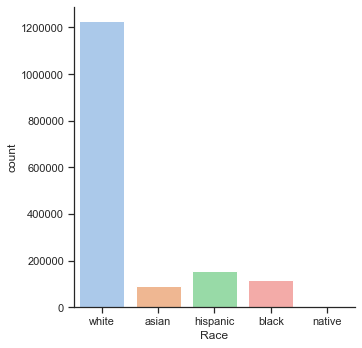

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Race", kind="count", palette="pastel", data=patients_clean)

## There are 1,590,897 unique patients in the csv patients concatenated file.